# Visualizing Errors

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Basic Errorbars

`plt.errorbar()`

- `fmt`: format code controlling the appearance of lines and points, same syntax as the shorthand used in `plt.plot`

<ErrorbarContainer object of 3 artists>

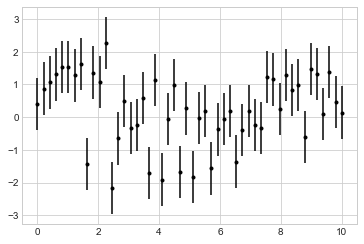

In [3]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k')

Tips: Make the errorbars lighter than the points themselves:

<ErrorbarContainer object of 3 artists>

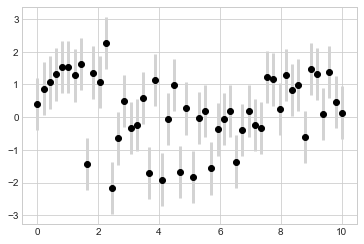

In [7]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)

## Continuous Errors

Show errorbars on continuous quantities: Combine primitives like `plt.plot` and `plt.fill_between` for a useful result.

Example: a simple Gaussian process regression, which a method of fitting a very flexible non-parametric function to data with a continuous measure of the uncertainty.

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor

# Define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Fit the gaussian process

gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
y_mean, y_std = gp.predict(xfit[:, np.newaxis], return_std=True)


We can use the `plt.fill_between` function with a light color to visualize this continuous error:

(0, 10)

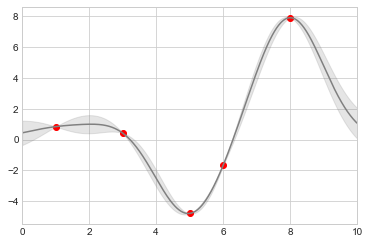

In [24]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, y_mean, '-', color='gray')

plt.fill_between(xfit, y_mean - y_std, y_mean + y_std,
                 color='gray', alpha=0.2)

plt.xlim(0, 10)

The resulting figure gives a very intuitive view into what the Gaussian process regression algorithm is doing: 

- In regions near a measured data point, the model is strongly constrained and this is reflected in the small model errors. 

- In regions far from a measured data point, the model is not strongly constrained, and the model errors increase.